In [1]:
devtools::load_all()
library(RPostgres)
library(DT)
library(gridExtra)
library(ggplot2)
if (!require(reshape2)) { install.packages("reshape2") }
library(reshape2)
if (!require(rpivotTable)) { install.packages("rpivotTable")}
library(rpivotTable)

c <- benchbuild::login("bb")
library(repr)
options(repr.plot.width=12, repr.plot.height=8)

Loading benchbuild
Loading required package: reshape2
Loading required package: rpivotTable


In [2]:
exps <- benchbuild::get_experiments(c)

In [3]:
plot_comparison_data <- function(selected) {
  exps <- exps[exps$id %in% selected,]$id
  plot_data <- benchbuild::region_wise_comparison(c, exps)
  return(plot_data)
}

plot_comparison <- function(plot_data) {
  plot <- ggplot(data = plot_data, aes(x=cores, y=speedup, color = cores)) +
    geom_point() +
    coord_cartesian(ylim = c(-10,10)) +
    facet_wrap(~ project)
      theme(axis.text = element_text(size = 8), axis.text.x = element_text(angle = 45, hjust = 1),
              legend.position="none")
  return(plot)
}

scatter_plot <- function(plot_data) {
  plot <- ggplot(data = plot_data, aes(y=speedup, x=runtime_jit, color=cores)) +
    scale_x_log10() +
    geom_point(size=0.5) +
    geom_hline(yintercept=0) +
    coord_cartesian(ylim = c(-10,10)) +
    facet_wrap(~ cores) +
    geom_smooth(method=lm, se=TRUE, fullrange=TRUE, size=0.5) +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(angle = 45, hjust = 1))
  return(plot)
}

project_plot <- function(plot_data) {
  plot <- ggplot(data = plot_data, aes(y=speedup, x=project, color=cores)) +
    geom_point(size=0.2) +
    geom_jitter() +
    geom_hline(yintercept=0) +
    coord_cartesian(ylim = c(-10,10)) +
    #facet_wrap(~ t) +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(angle = 45, hjust = 1))
  return(plot)
}

bar_plot <- function(plot_data) {
  plot <- ggplot(data = plot_data, aes(y=speedup, x=region_name, fill=cores)) +
    geom_bar(stat="identity", position="dodge") +
    geom_hline(yintercept=0) +
    facet_wrap(~ cores) +
    coord_cartesian(ylim = c(-10,10)) +
    scale_x_discrete() +
    scale_y_discrete(limits = c(-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10))
    theme(axis.text = element_text(size = 8))
    #,
    #      axis.text.x = element_text(angle = 45, hjust = 1))
  return(plot)
}


In [45]:
#data <- plot_comparison_data(c(
#    '0f42573f-973d-4cd4-bfac-b71961d100ed',
#    '09de35a6-f0af-4577-91a2-a564b63ef900'
#))
polybench <- plot_comparison_data(c('9fd28f1b-8a9e-4d99-b495-e3b18fe9d347'))
llvm_nt <-plot_comparison_data(c('45d076f4-52b7-4d38-8cea-4e1d64714aed'))
benchbuild <- plot_comparison_data(c('d5c856a3-4f78-4988-b43f-a349d246eab2'))

data <- rbind(polybench, llvm_nt)
data <- rbind(data, benchbuild)

data$region_name <- as.numeric(factor(data$region_name))
data <- data[data$runtime_jit > 1000,]
data <- transform(data, speedup = ifelse(speedup >= 1, speedup-1, -1/speedup+1))
data <- data[complete.cases(data),]
data

,project,region_name,cores,runtime_jit,runtime_no_recomp,speedup
1,ludcmp,44,5,8674050,386083870,43.51022
2,cholesky,44,5,8770138,383899522,42.77349
3,cholesky,44,4,11203508,383816264,33.25858
4,ludcmp,44,4,11210642,383155162,33.17781
5,correlation,56,5,2206754,75315458,33.12952
6,3mm,50,5,2525448,77192584,29.56590
7,ludcmp,44,3,13012194,386490186,28.70215
8,cholesky,44,3,13006294,385892570,28.66968
9,correlation,56,4,2638168,75272412,27.53208
10,2mm,49,5,1944084,54812510,27.19452


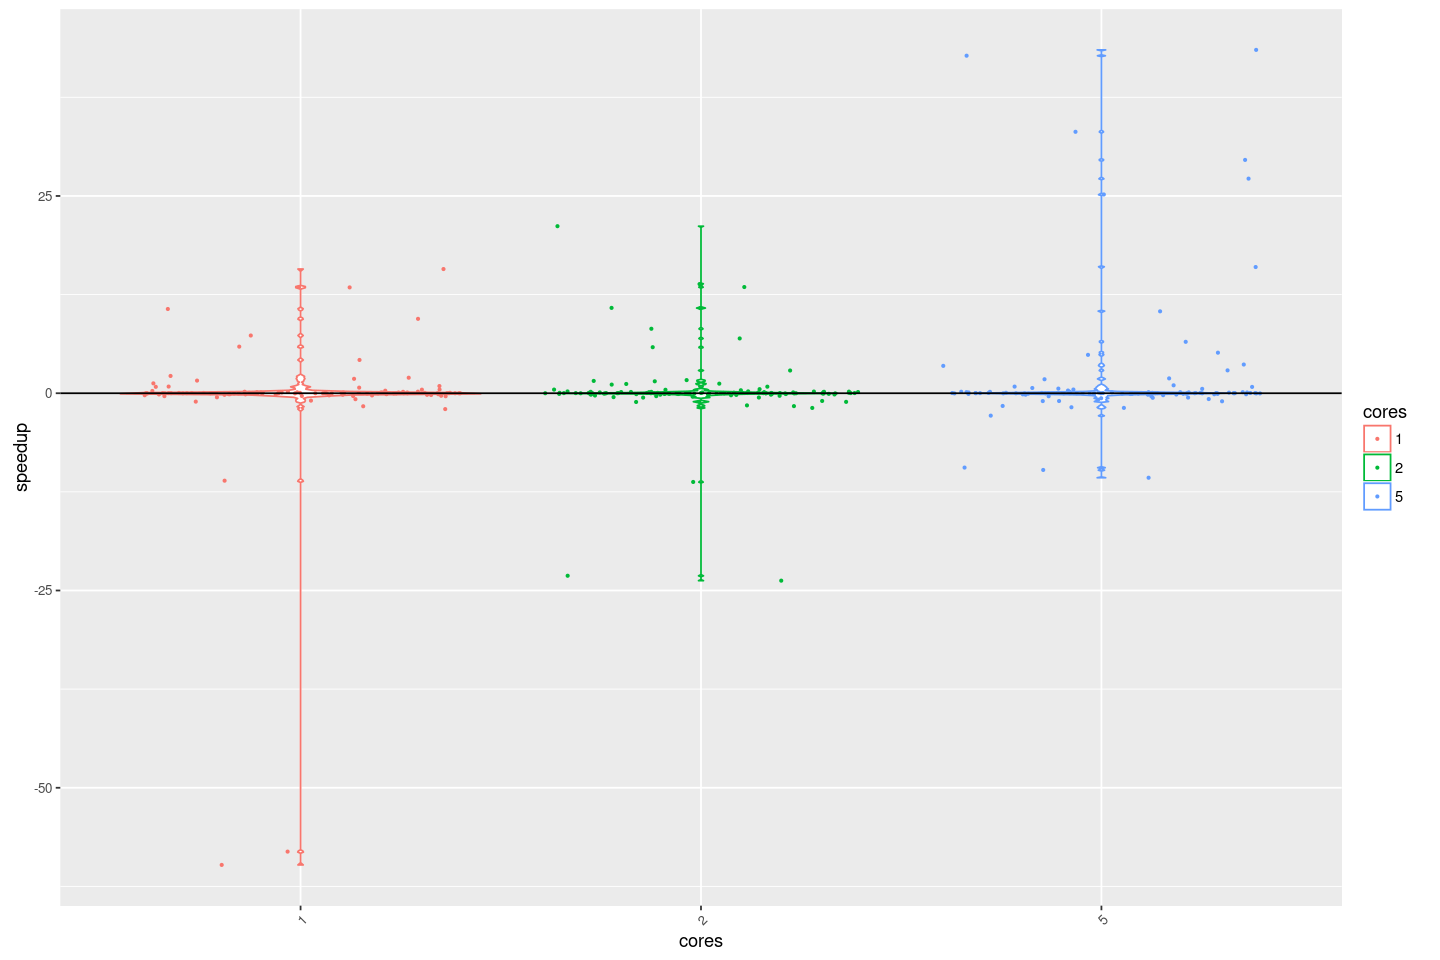

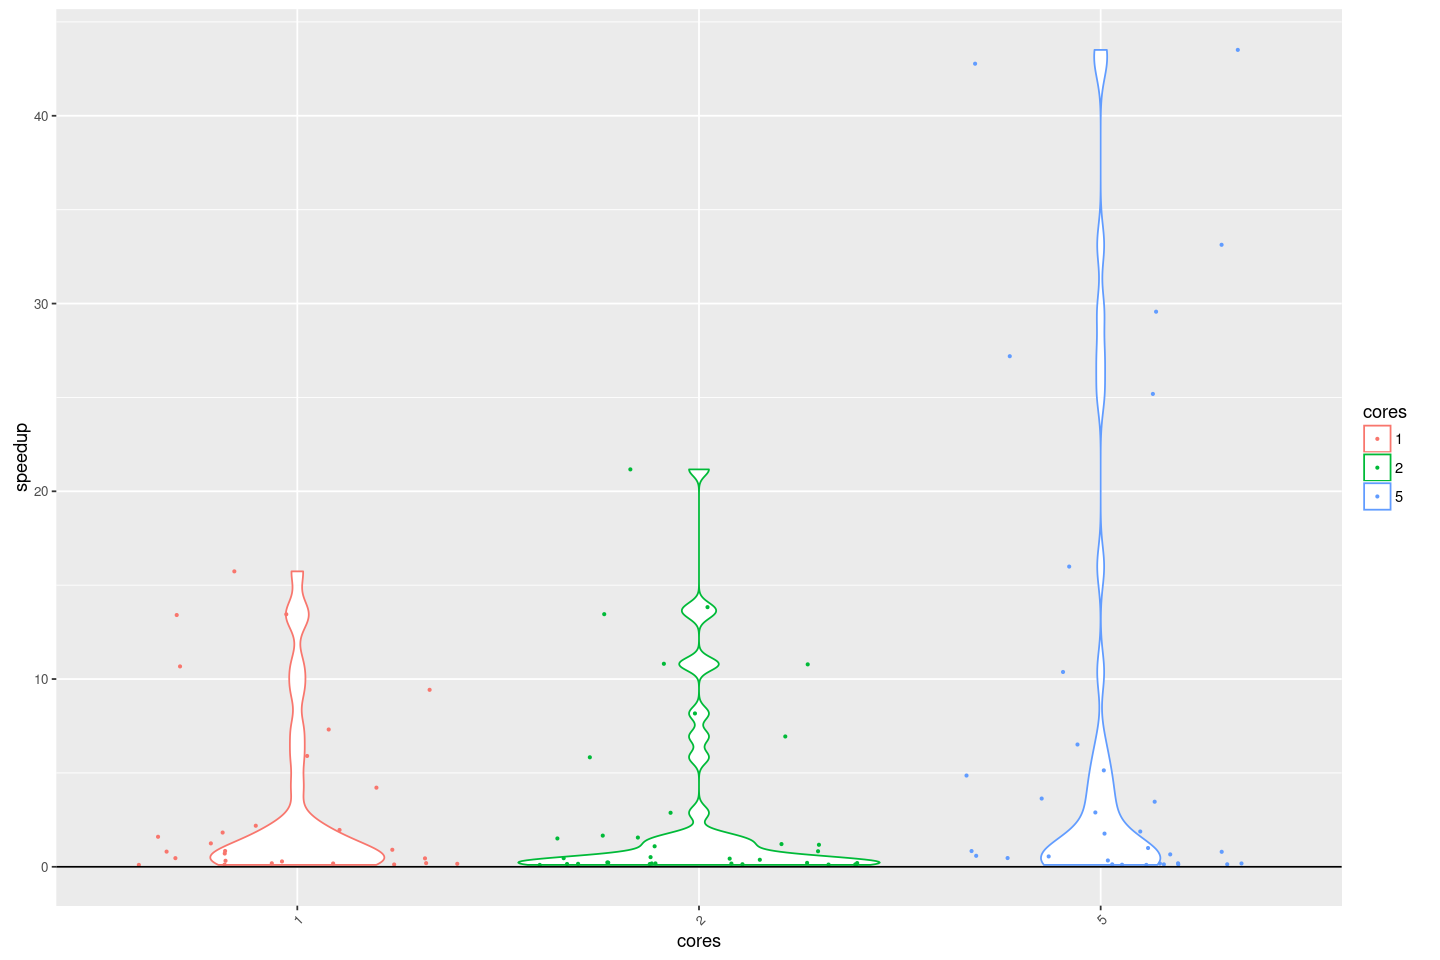

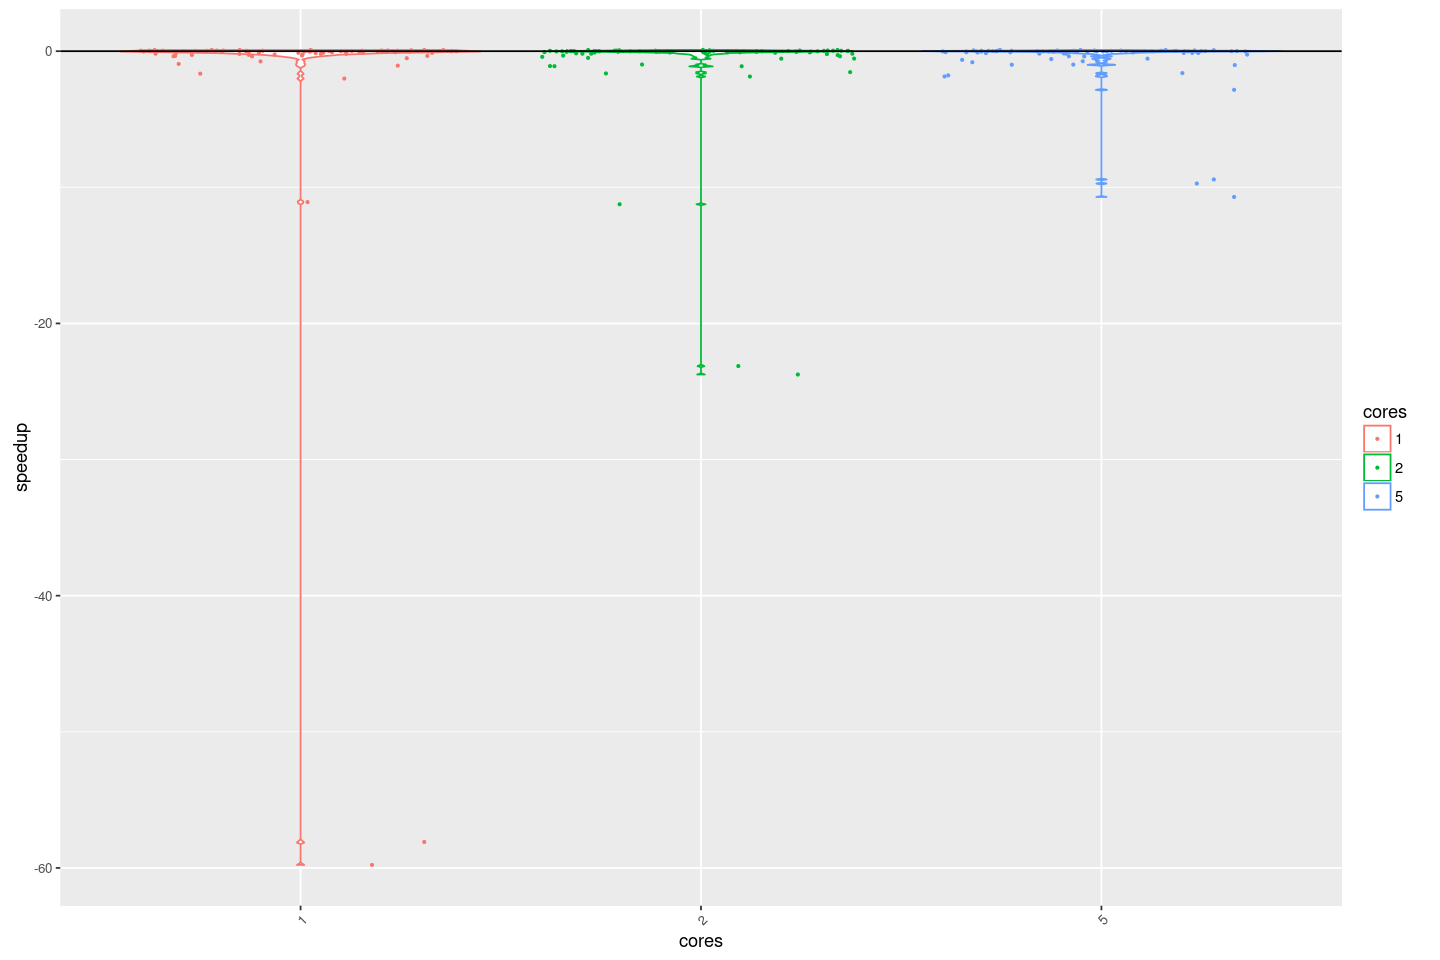

In [82]:
box_plot <- function(plot_data) {
  plot <- ggplot(data = plot_data, aes(y=speedup, x=cores, color=cores)) +
    geom_violin(trim= TRUE, adjust = 0.5) +
    geom_jitter(height=0, size=0.5) +
    geom_hline(yintercept=0) +
    coord_cartesian(ylim = c(min(plot_data$speedup),max(plot_data$speedup))) +
    #facet_wrap(~ t) +
    theme(axis.text = element_text(size = 8),
          axis.text.x = element_text(angle = 45, hjust = 1))
  return(plot)
}

pos <- data[(as.numeric(data$cores) %in% c(1,2,5)),]
pos <- pos[pos$speedup > 0.1,]
neg <- data[(as.numeric(data$cores) %in% c(1,2,5)),]
neg <- neg[neg$speedup < 0.1,]
#data_pos <- data_filter[(data_filter$speedup > 0.50),]

neg$t <- "bad"
pos$t <- "good"

all <- rbind(neg, pos)

box_plot(all)
box_plot(pos)
box_plot(neg)